<a href="https://colab.research.google.com/github/ravindrabharathi/Project1/blob/master/Session5/Normalization_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Normalization and Regularization in Convolution Neural Networks 


We are now building on top of the our last exercise where we built a CNN with less than 15K parameters in 4 steps ([Step 1](https://github.com/ravindrabharathi/Project1/blob/master/Session4/First_DNN.ipynb) , [Step 2](https://github.com/ravindrabharathi/Project1/blob/master/Session4/Second_DNN.ipynb) , [Step 3](https://github.com/ravindrabharathi/Project1/blob/master/Session4/Third_DNN.ipynb) , [Step 4](https://github.com/ravindrabharathi/Project1/blob/master/Session4/Fourth_DNN.ipynb) and reached an accuracy of 99.52 in about 60 epochs .

We will use the model from our 4th iteration as the starting point and add the following 

1. Image Normalization 
2. L2 Regularization to the Cost function (applied to kernel weights )
3. Additional experiment of what happens when Batch Normalization is added before and after the ReLU activation 


###Import necessary libraries / modules
Import numpy library for array/ matrix operations

Import Sequential Model from keras/models for building the model

Import Conv2D , Activation , Flatten , BatchNormalization, MaxPooling2D from keras/layers 

Import np_utils module from keras/utils for numpy related helper functions

Import mnist dataset containing hand-written digits images from keras.datasets

In [1]:
import numpy as np

from keras.models import Sequential,load_model
from keras.layers import Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


###print the shape of training data and also inspect the first image using matplotlib

(60000, 28, 28)


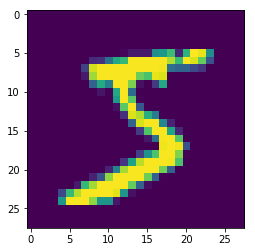

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

####Reshape the training and test dataset to include the channel information.In this case it is a greyscale image and so there is 1 channel . the image data was read in as a 28x28 numpy array and is now reshaped to 28x28x1

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

###Cast training data as float32 and normalize/re-scale the values such that they are between 0 and 1 instead of 0 and 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

###inspect the first 10 training class labels . They will be some number between 0 and 9 representing the hand-written digit in the corresponding Training data. Each of 0 to 9 represents a class

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

####One hot encoding of training and test class labels : Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

####Model with BatchNormalization after ReLU 

In [9]:
# to get a certain degeree of predictability when generating random numbers,
# set a random seed to initialize the pseudo-random number generator 
np.random.seed(seed=42)  

# instantiate a sequential model
model = Sequential()

# add the first convolution layer - 10 numbers of 3x3 filters , 
#This layer sees the input image of 28x28 x 1 channel . 

model.add(Conv2D(10, (3, 3), input_shape=(28,28,1), use_bias=False))  # remove bias param by setting it to false 
 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 
model.add(Dropout(0.1))  #add dropout

# Now the global receptive field is 3 x 3 

# First Convolution Block
# Block1 conv layer 1 - 12 filters of shape  3x3x10 
# input from previous layer is 26 x 26 x 10 . 

## Block 1

model.add(Conv2D(12, 3, use_bias=False))  # remove bias param by setting it to false 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 
model.add(Dropout(0.1))   #add dropout

#Global receptive field is 5x5

# Add convolution layer - 16 filters of shape  3x3x12 
#input from previous layer is 24 x 24 x 12 . 

model.add(Conv2D(16, 3, use_bias=False))  # remove bias param by setting it to false 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 
model.add(Dropout(0.1))    #add dropout

#Global receptive field is 7x7

##  Transition block 

# Perform 2x2 max pooling  . 
#Input from previous layer is 22 x 22 X 16 

model.add(MaxPooling2D(2,2))


# After max pooling , 2D spatial dimension reduces by half , i.e it becomes 11 x 11 . 
# Maxpooling (withpool size 2 and stride 1) doubles receptive field . 
# So global receptive field after max pooling is 14 x 14

# add 1x1 convolution to reduce the channel numbers to 10 

model.add(Conv2D(10, 1, use_bias=False))  # remove bias param by setting it to false 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 


#Convolution Block 2

# Add convolution layer - 12 filters of shape 3x3x10
#input from transition layer is 11 x 11 x 10 .  

model.add(Conv2D(12, 3,  use_bias=False))  # remove bias param by setting it to false 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 
model.add(Dropout(0.1))   #add dropout

#Global receptive field is now 16 x 16 

# Add convolution layer - 16 filters of shape 3x3x12 
#input coming from previous layer is 9 x 9 x 12 . 

model.add(Conv2D(16, 3,  use_bias=False)) # remove bias param by setting it to false 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 
model.add(Dropout(0.1))

#  Global receptive field is now 18 x 18 


# Add 1x1 convolution to reduce number of channels to 10  
#input coming from previous layer is 7 x 7 x 16 .

model.add(Conv2D(10, 1,  use_bias=False))  # remove bias param by setting it to false 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 


#Global receptive field is now 18 x 18 

# Last layer :  Add convolution layer - 10 filters of shape 7x7x10 
#input coming from previous layer is 7 x 7 x 10 .

model.add(Conv2D(10, 7,  use_bias=False))  # remove bias param by setting it to false 
#No Batch normalization before prediction 
# Note absence of ReLU activation here 


model.add(Flatten())  # Flatten the 2d array to 1d input for the softmax activation 
model.add(Activation('softmax'))   # Softmax activation to out class probabilities 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        90        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 12)        1080      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 12)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 12)        48        
__________

In [0]:
# define a learning rate scheduler . We will use a simple scheduler that reduces the lr by 10% every 3 epochs subject to a minimum lr of 0.0005 
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  if (epoch%3==0 and epoch):
    new_lr = max(0.9*lr,0.0005) 
  else:
    new_lr=lr
  
  return round(new_lr, 10)
  
 



In [0]:
#start with a higher lr of 0.003 
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

###Define a ModelCheckPoint callback which will be called at the end of every training epoch . We will use this callback function to save the model whenever validation accuracy improves . We do this so that we can load and use the best model for further predictions after training 

In [0]:
from keras.callbacks import ModelCheckpoint

chkpoint_model=ModelCheckpoint("model_custom_v1_mnist_best.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max') 



In [0]:
 callback_list=[chkpoint_model,LearningRateScheduler(scheduler, verbose=1)]

# Image Normalization 


Image Normalization is done so that the input data /pixel values are in a similar data distribution . We subtract the mean from each pixel value and divide by the standard deviation to get a zero centered and normally distributed data. Typically the data is scaled such that min pixel intensity is set to 0 and max pixel intensity of the input is at 1. 
![Data distribution - Image Normalization](https://raw.githubusercontent.com/ravindrabharathi/eip3/master/images/image-normalization1.png)

By doing this , we ensure that weight updates are in a similar range thus resulting in a faster convergence. In the below image weight updates for w1 and w2 will progress at different speed towards a minima

![un-normalized](https://raw.githubusercontent.com/ravindrabharathi/eip3/master/images/weights-unnormalized.png)

Whereas in the case of a normalized data , the weight updates will be in similar range 

![normalized data](https://raw.githubusercontent.com/ravindrabharathi/eip3/master/images/normalized-weights.png)


In keras we perform image normalization by using an imagedatagenerator and setting its featurewise_center and featurewise_std_normalization to True 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

batch_size=128

train_datagen=ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        #samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        #samplewise_std_normalization=False,  # divide each input by its std
)

val_datagen= ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        
)


train_datagen.fit(X_train)

val_datagen.fit(X_test)

training_generator=train_datagen.flow(X_train,Y_train, batch_size=batch_size,shuffle=True,seed=42)

validation_generator=val_datagen.flow(X_test,Y_test, batch_size=batch_size,shuffle=True,seed=42)



In [16]:
model.fit_generator(training_generator, epochs=40, 
                        steps_per_epoch=60000//batch_size, 
                    validation_steps=10000//batch_size, 
                    validation_data=validation_generator,shuffle=True,callbacks=callback_list,verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 10s 22ms/step - loss: 0.1883 - acc: 0.9405 - val_loss: 0.0579 - val_acc: 0.9815

Epoch 00001: val_acc improved from -inf to 0.98147, saving model to model_custom_v1_mnist_best.h5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 7s 14ms/step - loss: 0.0646 - acc: 0.9800 - val_loss: 0.0463 - val_acc: 0.9849

Epoch 00002: val_acc improved from 0.98147 to 0.98491, saving model to model_custom_v1_mnist_best.h5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 7s 14ms/step - loss: 0.0518 - acc: 0.9833 - val_loss: 0.0456 - val_acc: 0.9854

Epoch 00003: val_acc improved from 0.98491 to 0.98541, saving model to model_custom_v1_mnist_best.h5
Epoch 4/40

Epoch 00004: LearningRateSchedule

### With Image Normalization added , we trained for 40 epochs and the max validation accuracy is 99.453 

#Add Weight Regularization 

L1 and L2 weight decay are a way to regularize the cost function and in the process help overcome overfitting 

L1 weight regularization ![L1](https://raw.githubusercontent.com/ravindrabharathi/eip3/master/images/L1-weight-decay.png)


L2 weight regularization ![L2](https://raw.githubusercontent.com/ravindrabharathi/eip3/master/images/L2-weight-decay.png)


Typically L2 regularization is used  and this is what we will use in for this model . 


In [0]:
from keras import regularizers

reg=regularizers.l2(0.001)

In [0]:
# to get a certain degeree of predictability when generating random numbers,
# set a random seed to initialize the pseudo-random number generator 
np.random.seed(seed=42)  

# instantiate a sequential model
model = Sequential()

# add the first convolution layer - 10 numbers of 3x3 filters , 
#This layer sees the input image of 28x28 x 1 channel . 

model.add(Conv2D(10, (3, 3), input_shape=(28,28,1), use_bias=False, kernel_regularizer=reg))  # remove bias param by setting it to false 
 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 
model.add(Dropout(0.1))  #add dropout

# Now the global receptive field is 3 x 3 

# First Convolution Block
# Block1 conv layer 1 - 12 filters of shape  3x3x10 
# input from previous layer is 26 x 26 x 10 . 

## Block 1

model.add(Conv2D(12, 3, use_bias=False, kernel_regularizer=reg))  # remove bias param by setting it to false 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 
model.add(Dropout(0.1))   #add dropout

#Global receptive field is 5x5

# Add convolution layer - 16 filters of shape  3x3x12 
#input from previous layer is 24 x 24 x 12 . 

model.add(Conv2D(16, 3, use_bias=False, kernel_regularizer=reg))  # remove bias param by setting it to false 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 
model.add(Dropout(0.1))    #add dropout

#Global receptive field is 7x7

##  Transition block 

# Perform 2x2 max pooling  . 
#Input from previous layer is 22 x 22 X 16 

model.add(MaxPooling2D(2,2))


# After max pooling , 2D spatial dimension reduces by half , i.e it becomes 11 x 11 . 
# Maxpooling (withpool size 2 and stride 1) doubles receptive field . 
# So global receptive field after max pooling is 14 x 14

# add 1x1 convolution to reduce the channel numbers to 10 

model.add(Conv2D(10, 1, use_bias=False, kernel_regularizer=reg))  # remove bias param by setting it to false 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 


#Convolution Block 2

# Add convolution layer - 12 filters of shape 3x3x10
#input from transition layer is 11 x 11 x 10 .  

model.add(Conv2D(12, 3,  use_bias=False, kernel_regularizer=reg))  # remove bias param by setting it to false 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 
model.add(Dropout(0.1))   #add dropout

#Global receptive field is now 16 x 16 

# Add convolution layer - 16 filters of shape 3x3x12 
#input coming from previous layer is 9 x 9 x 12 . 

model.add(Conv2D(16, 3,  use_bias=False, kernel_regularizer=reg)) # remove bias param by setting it to false 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 
model.add(Dropout(0.1))

#  Global receptive field is now 18 x 18 


# Add 1x1 convolution to reduce number of channels to 10  
#input coming from previous layer is 7 x 7 x 16 .

model.add(Conv2D(10, 1,  use_bias=False, kernel_regularizer=reg))  # remove bias param by setting it to false 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(BatchNormalization())  #add Batch normalization 


#Global receptive field is now 18 x 18 

# Last layer :  Add convolution layer - 10 filters of shape 7x7x10 
#input coming from previous layer is 7 x 7 x 10 .

model.add(Conv2D(10, 7,  use_bias=False,kernel_regularizer=reg))  # remove bias param by setting it to false 
#No Batch normalization before prediction 
# Note absence of ReLU activation here 


model.add(Flatten())  # Flatten the 2d array to 1d input for the softmax activation 
model.add(Activation('softmax'))   # Softmax activation to out class probabilities 

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        90        
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_6 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 12)        1080      
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 12)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 12)        48        
__________

In [0]:
# define a learning rate scheduler . We will use a simple scheduler that reduces the lr by 10% every 3 epochs subject to a minimum lr of 0.0005 
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  if (epoch%3==0 and epoch):
    new_lr = max(0.9*lr,0.0005) 
  else:
    new_lr=lr
  
  return round(new_lr, 10)
  
 



In [0]:
#start with a higher lr of 0.003 
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:


chkpoint_model=ModelCheckpoint("model_custom_v2_mnist_best.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max') 



In [0]:
 callback_list=[chkpoint_model,LearningRateScheduler(scheduler, verbose=1)]

In [24]:
batch_size=128

train_datagen=ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        #samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        #samplewise_std_normalization=False,  # divide each input by its std
)

val_datagen= ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        
)


train_datagen.fit(X_train)

val_datagen.fit(X_test)

training_generator=train_datagen.flow(X_train,Y_train, batch_size=batch_size,shuffle=True,seed=42)

validation_generator=val_datagen.flow(X_test,Y_test, batch_size=batch_size,shuffle=True,seed=42)



model.fit_generator(training_generator, epochs=40, 
                        steps_per_epoch=60000//batch_size, 
                    validation_steps=10000//batch_size, 
                    validation_data=validation_generator,shuffle=True,callbacks=callback_list,verbose=1)

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 9s 20ms/step - loss: 0.2742 - acc: 0.9405 - val_loss: 0.1286 - val_acc: 0.9828

Epoch 00001: val_acc improved from -inf to 0.98277, saving model to model_custom_v2_mnist_best.h5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 7s 15ms/step - loss: 0.1331 - acc: 0.9799 - val_loss: 0.1128 - val_acc: 0.9827

Epoch 00002: val_acc did not improve from 0.98277
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 8s 16ms/step - loss: 0.1107 - acc: 0.9826 - val_loss: 0.0970 - val_acc: 0.9852

Epoch 00003: val_acc improved from 0.98277 to 0.98521, saving model to model_custom_v2_mnist_best.h5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0027.
468/468 [==============================] - 7s 15ms/step - loss: 0

####We added L2 regularization , trained for 40 epochs and reached a max validation accuracy of 99.382 . The effect of regularization is to prevent overfitting and reduxe the gap between training and validation accuracies 

#Model with BatchNormalization placed before ReLU activation 

Let us try experiment with the placement of BatchNormalization before ReLU activation to see if it makes any diference 





In [0]:
# to get a certain degeree of predictability when generating random numbers,
# set a random seed to initialize the pseudo-random number generator 
np.random.seed(seed=42)  

# instantiate a sequential model
model = Sequential()

# add the first convolution layer - 10 numbers of 3x3 filters , 
#This layer sees the input image of 28x28 x 1 channel . 

model.add(Conv2D(10, (3, 3), input_shape=(28,28,1), use_bias=False,kernel_regularizer=reg))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization  
model.add(Activation('relu'))    # use ReLU activation function .
model.add(Dropout(0.1))  #add dropout

# Now the global receptive field is 3 x 3 

# First Convolution Block
# Block1 conv layer 1 - 12 filters of shape  3x3x10 
# input from previous layer is 26 x 26 x 10 . 

## Block 1

model.add(Conv2D(12, 3, use_bias=False,kernel_regularizer=reg))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(Dropout(0.1))   #add dropout

#Global receptive field is 5x5

# Add convolution layer - 16 filters of shape  3x3x12 
#input from previous layer is 24 x 24 x 12 . 

model.add(Conv2D(16, 3, use_bias=False,kernel_regularizer=reg))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization
model.add(Activation('relu'))    # use ReLU activation function .
model.add(Dropout(0.1))    #add dropout

#Global receptive field is 7x7

##  Transition block 

# Perform 2x2 max pooling  . 
#Input from previous layer is 22 x 22 X 16 

model.add(MaxPooling2D(2,2))


# After max pooling , 2D spatial dimension reduces by half , i.e it becomes 11 x 11 . 
# Maxpooling (withpool size 2 and stride 1) doubles receptive field . 
# So global receptive field after max pooling is 14 x 14

# add 1x1 convolution to reduce the channel numbers to 10 

model.add(Conv2D(10, 1, use_bias=False,kernel_regularizer=reg))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization 
model.add(Activation('relu'))    # use ReLU activation function .


#Convolution Block 2

# Add convolution layer - 12 filters of shape 3x3x10
#input from transition layer is 11 x 11 x 10 .  

model.add(Conv2D(12, 3,  use_bias=False,kernel_regularizer=reg))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization
model.add(Activation('relu'))    # use ReLU activation function .
model.add(Dropout(0.1))   #add dropout

#Global receptive field is now 16 x 16 

# Add convolution layer - 16 filters of shape 3x3x12 
#input coming from previous layer is 9 x 9 x 12 . 

model.add(Conv2D(16, 3,  use_bias=False,kernel_regularizer=reg)) # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization 
model.add(Activation('relu'))    # use ReLU activation function .
model.add(Dropout(0.1))

#  Global receptive field is now 18 x 18 


# Add 1x1 convolution to reduce number of channels to 10  
#input coming from previous layer is 7 x 7 x 16 .

model.add(Conv2D(10, 1,  use_bias=False,kernel_regularizer=reg))  # remove bias param by setting it to false 
model.add(BatchNormalization())  #add Batch normalization 
model.add(Activation('relu'))    # use ReLU activation function .


#Global receptive field is now 18 x 18 

# Last layer :  Add convolution layer - 10 filters of shape 7x7x10 
#input coming from previous layer is 7 x 7 x 10 .

model.add(Conv2D(10, 7,  use_bias=False,kernel_regularizer=reg))  # remove bias param by setting it to false 
#No Batch normalization before prediction 
# Note absence of ReLU activation here 


model.add(Flatten())  # Flatten the 2d array to 1d input for the softmax activation 
model.add(Activation('softmax'))   # Softmax activation to out class probabilities 

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
activation_17 (Activation)   (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 12)        1080      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 12)        48        
_________________________________________________________________
activation_18 (Activation)   (None, 24, 24, 12)        0         
__________

In [0]:
# define a learning rate scheduler . We will use a simple scheduler that reduces the lr by 10% every 3 epochs subject to a minimum lr of 0.0005 
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  if (epoch%3==0 and epoch):
    new_lr = max(0.9*lr,0.0005) 
  else:
    new_lr=lr
  
  return round(new_lr, 10)
  
 



In [0]:

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:


chkpoint_model=ModelCheckpoint("model_custom_v3_mnist_best.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max') 



In [0]:
 callback_list=[chkpoint_model,LearningRateScheduler(scheduler, verbose=1)]

In [31]:
batch_size=128

train_datagen=ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        #samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        #samplewise_std_normalization=False,  # divide each input by its std
)

val_datagen= ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        
)


train_datagen.fit(X_train)

val_datagen.fit(X_test)

training_generator=train_datagen.flow(X_train,Y_train, batch_size=batch_size,shuffle=True,seed=42)

validation_generator=val_datagen.flow(X_test,Y_test, batch_size=batch_size,shuffle=True,seed=42)



model.fit_generator(training_generator, epochs=40, 
                        steps_per_epoch=60000//batch_size, 
                    validation_steps=10000//batch_size, 
                    validation_data=validation_generator,shuffle=True,callbacks=callback_list,verbose=1)

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 9s 20ms/step - loss: 0.2885 - acc: 0.9372 - val_loss: 0.1544 - val_acc: 0.9772

Epoch 00001: val_acc improved from -inf to 0.97716, saving model to model_custom_v3_mnist_best.h5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 7s 15ms/step - loss: 0.1354 - acc: 0.9781 - val_loss: 0.1375 - val_acc: 0.9746

Epoch 00002: val_acc did not improve from 0.97716
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 8s 16ms/step - loss: 0.1127 - acc: 0.9809 - val_loss: 0.0932 - val_acc: 0.9851

Epoch 00003: val_acc improved from 0.97716 to 0.98511, saving model to model_custom_v3_mnist_best.h5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0027.
468/468 [==============================] - 7s 16ms/step - loss: 0

### There isn't a very significant difference in the validation accuracy after 40 epochs when we changed BatchNormalization to be before ReLU activation . Max validation accuracy after 40 epochs is 99.392 whereas before this change it was 99.382 after 40 epochs 

#Print the first 25 mis-classified images   

### Let us load the Model with best validation accuracy and print the evaluation score 

In [0]:
model=load_model("model_custom_v3_mnist_best.h5")

In [0]:
batch_size=128


val_datagen= ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        
)


val_datagen.fit(X_test)

validation_generator=val_datagen.flow(X_test,Y_test, batch_size=batch_size,shuffle=False,seed=42)


In [0]:
import math
score = model.evaluate_generator(validation_generator,steps=math.ceil(len(X_test)/batch_size) )

In [47]:
print(score)

[0.0454264534085989, 0.9937]


### Predict the classes using model.predict and print predicted probabilities and categorical array for True test classes 

In [0]:
batch_size=128


val_datagen= ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        
)


val_datagen.fit(X_test)

validation_generator=val_datagen.flow(X_test,Y_test, batch_size=batch_size,shuffle=False,seed=42)

y_pred = model.predict_generator(validation_generator,steps=math.ceil(len(X_test)/batch_size))

In [49]:
y_pred.shape

(10000, 10)

In [0]:
y_pred1=np.rint(y_pred)

In [0]:
y_pred2=np.argmax(y_pred,axis=1)

In [52]:
y_pred2.shape

(10000,)

In [53]:
print(y_pred1[:9])
print(y_pred2[:9])
print(y_test[:9])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[7 2 1 0 4 1 4 9 5]
[7 2 1 0 4 1 4 9 5]


In [54]:
print(len(y_pred1),len(Y_test))

10000 10000


### capture the images and labels that were misclassified 

In [63]:
wrong_set=[]
correct_set=[]
wrong_labels=[]
true_labels=[]
for i in range(10000):
  
  if (y_pred2[i]==y_test[i]):
    
    correct_set.append(X_test[i])
  else:
    wrong_labels.append(y_pred2[i])
    true_labels.append(y_test[i])
    wrong_set.append(X_test[i])
  
print(len(wrong_set),len(correct_set)) 

63 9937


###Render an image grid containing the first 25 mis-classified images 

            First 25 misclassified images 
           _________________________________



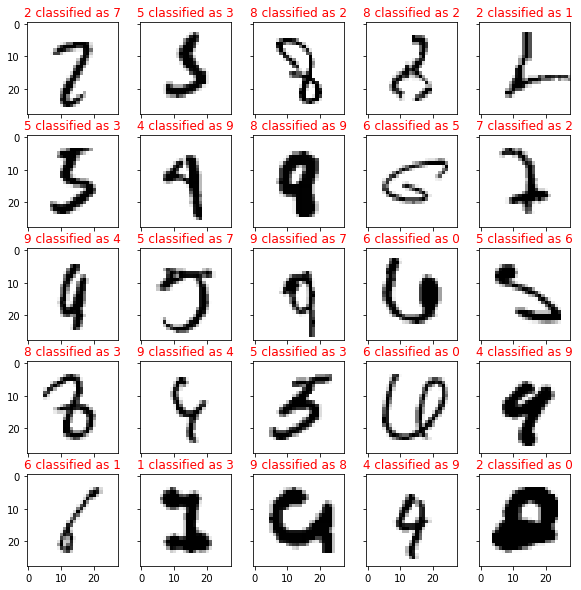

In [68]:
print('            First 25 misclassified images \n           _________________________________\n')
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, (10., 10.))

grid = ImageGrid(fig, 111,  
                 nrows_ncols=(5, 5),  
                 axes_pad=0.3,  
                 )
for i in range(25):
    grid[i].imshow(wrong_set[i].reshape(28,28),cmap='binary')
    grid[i].set_title('{0} classified as {1}'.format(true_labels[i],wrong_labels[i]),color='red')
    
plt.show()    

### We have now applied Image Normalization and L2 kernel regularization for the network . We also tested and found that applying BatchNormalization before or after ReLU activation didn't make a huge difference for this MNIST dataset . We also separated the images that were being wrongly classified and printed the first 25 images from the list 

